In [1]:
# 画图相关的设置
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# 导入各项所需的库。其中datasets那段取消了，取而代之的是读取本地数据
# import everything we need first
from keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
#from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

2024-05-06 17:32:11.258446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 17:32:11.308788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 17:32:11.310094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 17:32:11.987271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# 加载h5格式读写库
import h5py

In [4]:
# 从本地文件读训练数据
with h5py.File('Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

In [5]:
# 把读入的标签转为类型矩阵，即N*10的矩阵，[k, i]表示第k个样本属于i类型的概率
# 由于读入的是已知样本，所以每行都只有一个1，其他都是0
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

In [6]:
# 把数组转成float32类型
# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [7]:
# 将数据拆分成训练样本和测试样本，后续的算法将从训练样本中学习函数f(x)=y的函数f的参数
# 并且将学到的参数用在测试样本上，去检验“学习”到的参数的可靠性
# 其实本质就是拟合，但是是形式比较复杂的拟合
# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

In [8]:
# 创建神经网络实例，内部指定了函数的形式，对于CNN来说就是指定了每一层的形式。这个时候的网络是“空白”、“无知”的，参数是初始化的
# 最终求解参数的过程和我们做多项式拟合没有本质差异，不断找合适的系数，使得残差（这里叫损失）最小。
# 当然这里比多项式拟合的形式更加复杂，而且结果集合是离散的，而多项式的y是连续值，可以用均方根来表达残差情况。
# To create a neural network instance
galaxy10net = Galaxy10CNN()

# 指定最多迭代次数，这里设置成5是为了省点时间，反正是训练
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 5

In [9]:
%%time
# 训练网络。这是一个有监督学习，也就是知道训练样本的真实分类。如果是无监督的，算法还要自己去做分类。
# 训练完成后，参数就保存在了网络中。
# 在一个正规应用中，这些参数将被保存起来，未来需要的时候从文件中加载
# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

<timed eval>:6: UserWarning: Call to function train() is deprecated and will be removed in future. Use fit() instead.


Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False}
Datawise Center: {'input': False} 
Featurewise std Center: {'input': False}
Datawise std Center: {'input': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: {'output': False}
Datawise Center: {'output': False} 
Featurewise std Center: {'output': False}
Datawise std Center: {'output': False} 
====Message ends====
Epoch 1/5


2024-05-06 17:32:20.962098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-05-06 17:32:32.374234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


275/275 - 17s - loss: 1.8840 - categorical_accuracy: 0.3153 - val_loss: 1.6686 - val_categorical_accuracy: 0.3052 - lr: 0.0050 - 17s/epoch - 62ms/step
Epoch 2/5
275/275 - 16s - loss: 1.6020 - categorical_accuracy: 0.3548 - val_loss: 1.4729 - val_categorical_accuracy: 0.4557 - lr: 0.0050 - 16s/epoch - 57ms/step
Epoch 3/5
275/275 - 15s - loss: 1.4127 - categorical_accuracy: 0.4615 - val_loss: 1.2576 - val_categorical_accuracy: 0.5479 - lr: 0.0050 - 15s/epoch - 55ms/step
Epoch 4/5
275/275 - 16s - loss: 1.2145 - categorical_accuracy: 0.5690 - val_loss: 1.0838 - val_categorical_accuracy: 0.6120 - lr: 0.0050 - 16s/epoch - 59ms/step
Epoch 5/5
275/275 - 15s - loss: 1.0965 - categorical_accuracy: 0.6187 - val_loss: 1.0379 - val_categorical_accuracy: 0.6375 - lr: 0.0050 - 15s/epoch - 55ms/step
Completed Training, 80.07s in total
CPU times: user 29min 4s, sys: 4min 55s, total: 33min 59s
Wall time: 1min 21s


In [10]:
# 原例子没有的，保存模型，以便未来使用，但是能保存，没法加载
galaxy10net.save("galaxy_model.h5")

model_weights.h5 saved to /hdd23/jiezheng/data/ann/galaxy_model_2/model_weights.h5


/hdd23/jiezheng/.local/lib/python3.10/site-packages/astroNN/models/base_master_nn.py:347: UserWarning: To prevent your model being overwritten, your folder name changed from /hdd23/jiezheng/data/ann/galaxy_model.h5 to /hdd23/jiezheng/data/ann/galaxy_model_2


In [11]:
# 显示训练结果情况
# print model summary before training
galaxy10net.keras_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 69, 69, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 69, 69, 8)         224       
                                                                 
 activation (Activation)     (None, 69, 69, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 69, 69, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 16)       0         
 )                                                               
                                                             

In [12]:
# 使用模型，利用上面训练的结果，对测试样本进行分类
# 这里得到的是一个概率矩阵，同上所述，[k,i]表示第k个样本属于第i分类的概率，并不是确定的归属关系
# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

/tmp/ipykernel_638121/3651957271.py:5: UserWarning: Call to function test() is deprecated and will be removed in future. Use predict() instead.
Prediction progress:   0%|                                                                 | 0/2179 [00:00<?, ?sample/s]2024-05-06 17:33:41.062449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
Prediction progress:  76%|███████████████████████████████████████▋            | 1664/2179 [00:00<00:00, 4198.29sample/s]2024-05-06 17:33:41.689982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype 

In [13]:
# 把概率关系转换成确定关系，也就是第k个样本属于各个分类的概率中，最大的那个，就认为是它的结论
# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

In [14]:
# 前面把所有样本（不管是训练集还是测试集）的分类都转成了概率形式，这边转回来
# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

In [15]:
# 准备一个矩阵，m中分类，那就是m*m的矩阵，[i,j]记录着实际上是i，但是被分类到j的样本的个数。如果是True/False判定，其实就是真假阳性阴性的统计矩阵
# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

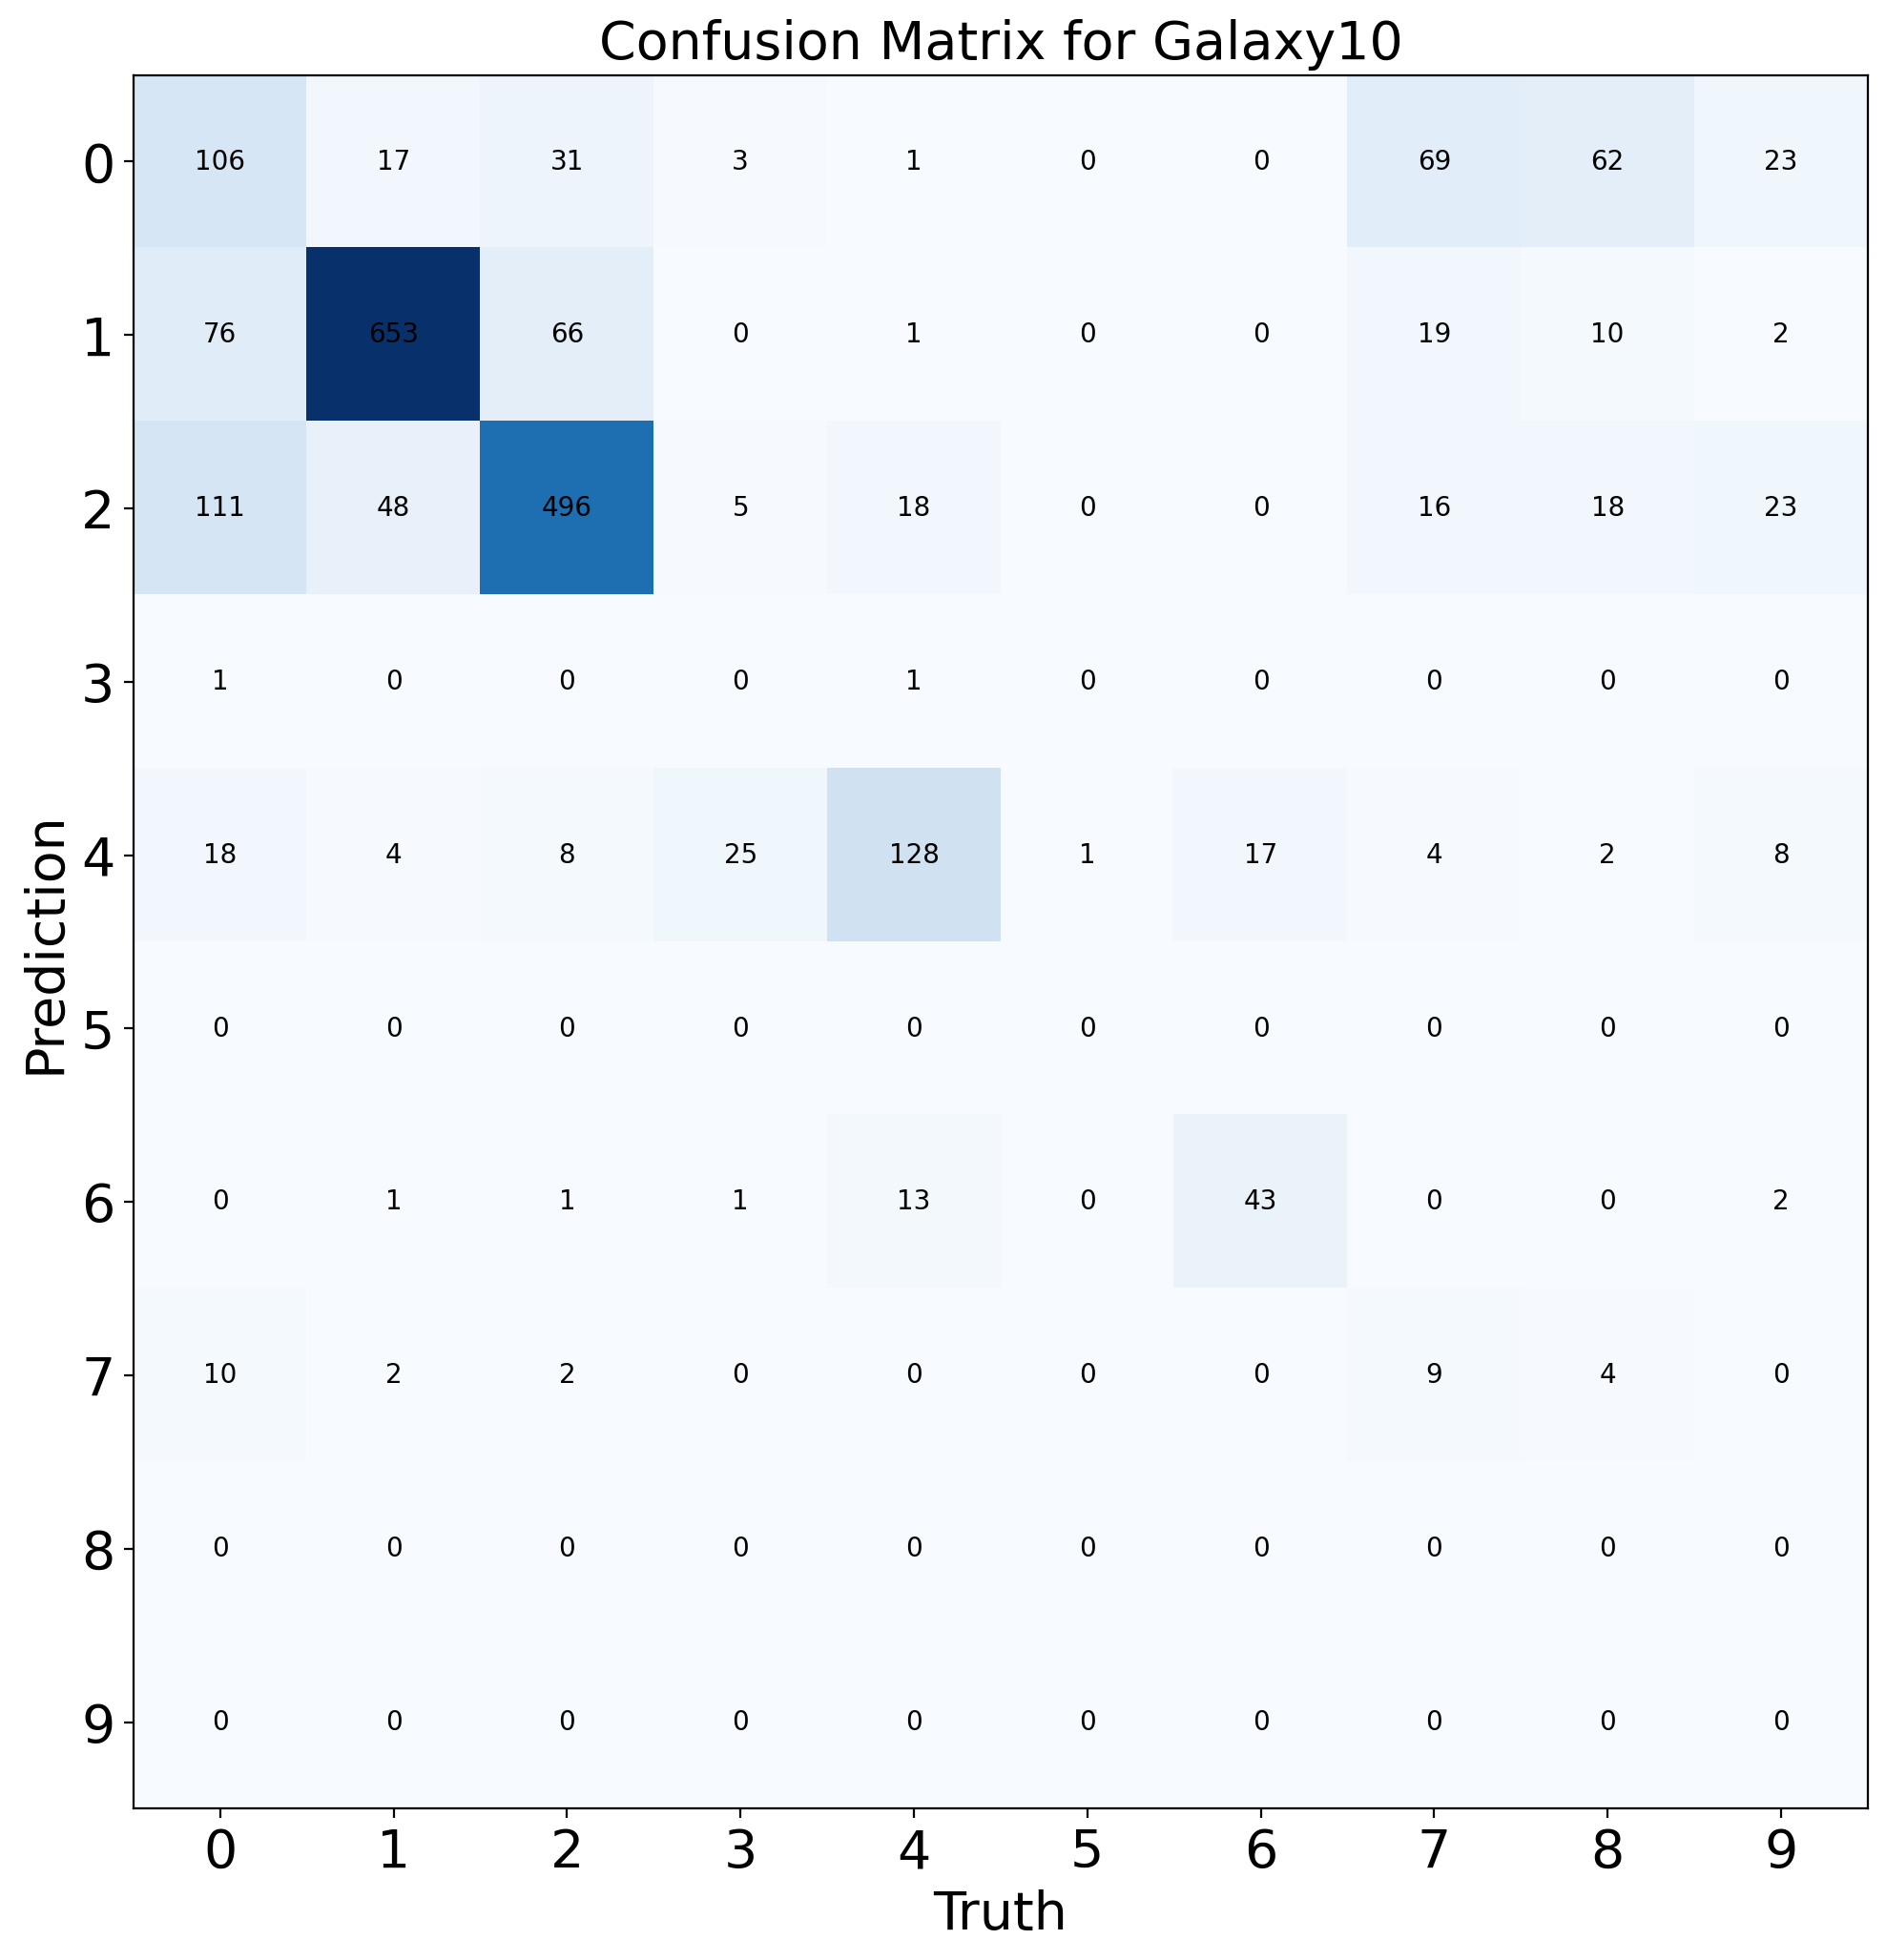

In [16]:
# 显示统计矩阵，核心关注主对角线，这是真阳性的判断率，其他都是错判的情况
# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)